## $\text{Introduction}$

---



$\text{Name : Kartik Srinivas}$


$\text{Roll : ES20BTECH11015}$

$\text{Welcome to the analysis of the Crane Problem !}$

1.   
$\text{All the equations have been coded in LaTeX by me}$ 
2.  
$\text{The necessary explanations have been provided }$ 


In [12]:
import math
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

m = 0.1
theta = 15*math.pi/180
T_max = 2
p_init = np.matrix([0,0]).T
p_final = np.matrix([10,2]).T
h =0.1
g = 9.8
epsilon = 1

## $\text{Notation}$

---



$\text{The Notations used are as follows}$



1.   $ \text{The Maximum Tension } T_{max} \ \in\ \mathbb{R} $


2.   $ \text{The Postion Matrix For all instants } p \ \in \ \mathbb{R^{2 \times n}} $


2.   $ \text{The Velocity Matrix For all instants } v \ \in \ \mathbb{R^{2 \times n}} $


3.    $ \text{The accuracy } 𝜀 \in  \ \mathbb{Z^{+}}$


4.   $ \text{The gravity } g \ \in\ \mathbb{R^{2 \times 1}} $


5.   $ \text{The Fraction Matrix } Frac \ \in\ \mathbb{R^{2 \times 2}} $


6.    $ \text{The Force Matrix } F \ \in\ \mathbb{R^{2 \times n - 1}} $




7.    $ \text{The Tension Matrix  } T \ \in\ \mathbb{R^{2 \times n - 1}} $



8.   $ \text{The Force Matrix } F \ \in\ \mathbb{R^{2 \times n - 1}} $



9.    $ \text{The mass } m \in  \ \mathbb{R^{+}}$



10.    $ \text{The Discretizing Unit } h \in  \ \mathbb{R^{+}}$


### $\text{Framing the Data}$


---

The value of the forces are directly obtainable from the Tension, to make computation simpler we arrange them as follows:-

\begin{align}
  T = \begin{bmatrix} T_{left}^{(1)} & T_{left}^{(2)} \ldots  T_{left}^{(n-1)}\\
  T_{right}^{(1)} & T_{right}^{(2)} \ldots T_{right}^{(n-1)}\\
  \end{bmatrix}
  \\
  \\
  Frac = \begin{bmatrix} -\sin(θ) & \sin(\theta) \\
  \cos(θ) & -\cos(θ) \\
  \end{bmatrix}
  \\
  \\
  F = Frac * T + m \times \begin{bmatrix}  0 & 0 & 0 \ldots \\
  g & g & g \ldots \\
  \end{bmatrix}
\end{align}

In [13]:

def find_Min_intervals(m,T_max,theta,p_init,p_final,h,epsilon):
    intervals = 0
    upper = 100
    lower = 0
    best = 0.0
    while (abs(upper - lower) > epsilon):
        print("alpha = ", intervals, " Upper = ", upper, "Lower = ", lower)

        intervals = int((upper + lower) / 2)
        T = cp.Variable((2, intervals - 1))
        Frac = np.matrix([[-np.sin(theta), np.sin(theta)],
                          [np.cos(theta), np.cos(theta)]])
        g = np.matrix([0, -9.8]).T
        F = m * np.tile(g, (1, intervals - 1)) + Frac @ T
        v = cp.Variable((2, intervals))
        p = cp.Variable((2, intervals))

        # constraints :-
        constraints = [T >= 0, T <= T_max]
        constraints += [p[:, [0]] == p_init, p[:, [intervals - 1]] == p_final]
        constraints += [p[:, 1:intervals] == p[:, 0:intervals - 1] + h * v[:, 0:intervals - 1]]
        constraints += [v[:, [0]] == 0, v[:, [intervals - 1]] == 0]
        constraints += [v[:, 1:intervals] == v[:, 0:intervals - 1] + (h / m) * F]

        prob = cp.Problem(cp.Minimize(intervals), constraints)
        prob.solve(solver=cp.ECOS)

        if prob.status == 'optimal':
            upper = intervals
            Tension = T.value
            Position = p.value
        else:
            lower = intervals
    return (Tension,Position,upper)


### $\text{The Main Idea}$


---

We Know that if time is sufficiently high then we can achieve our task easily.
Similarly, if the time is too low the task is not possible!
In order to find the minimum possible time to do our work , we must try to perform a bisection algorithm starting with a "feasible - not feasible" interval and work our way up until we find the best possible time( So the problem behaves in a **Quasiconvex** Way)

### $\text{Constraints}$


---



\begin{align}
        T \ge 0 
        \\
        T \le T_{max}
        \\  
        p_{0} = p_{initial}
        \\
        p_{n - 1} = p_{final}
        \\
        p_{k} = p_{k-1} + h \times v_{k-1}
        \\
        v_{0} = 0
        \\
        v_{n - 1} = 0
        \\
        v_k = v_{k-1} + h/m * F_{k-1}
        \\
\end{align}

alpha =  0  Upper =  100 Lower =  0
alpha =  50  Upper =  50 Lower =  0
alpha =  25  Upper =  50 Lower =  25
alpha =  37  Upper =  37 Lower =  25
alpha =  31  Upper =  37 Lower =  31
alpha =  34  Upper =  34 Lower =  31
alpha =  32  Upper =  34 Lower =  32
Intervals  = 
 34
best time = 
 3.4000000000000004


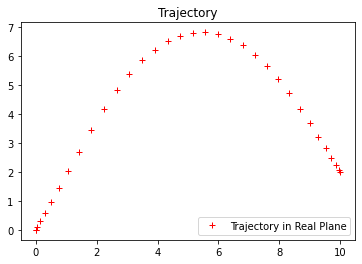

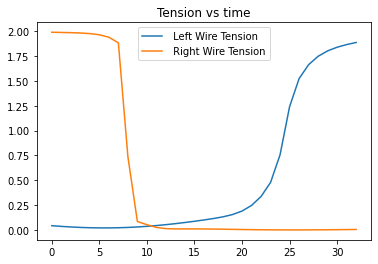

In [14]:
Tension, Position, intervals = find_Min_intervals(m,T_max,theta,p_init,p_final,h,epsilon)
print("Intervals  = \n",intervals)
print("best time = \n", intervals * h)
plt.plot(Position[0, :].T, Position[1, :].T,'r+',label = "Trajectory in Real Plane", )
plt.legend()
plt.title("Trajectory")
plt.show()

plt.plot(Tension[0,:],label = " Left Wire Tension")
plt.plot(Tension[1,:],label = " Right Wire Tension")
plt.legend()
plt.title("Tension vs time")
plt.show()

## $\text{Final Answer}$


---
$\text{Best Number of Intervals is found to be  = 34}$



$\text{Therefore the best time is found to be  = 3.4s}$

$\text{The trajectory is not linear because the linear path demands a higher value of}$ $\text{θ (because the acting angle  for the constrained tension is too small for horizontal changes in velocity)}$

$\text{Try running this for theta = 60 degrees (the path will be linear!)}$
